<a href="https://colab.research.google.com/github/yacanom/MINE-4210_202320_ANALISIS_CON_DEEP_LEARNING/blob/main/Laboratorio%204/MINE4210_ADL2023_LAB4_Pr%C3%A1ctica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Laboratorio 4 - Sesión 1**
## **Despligue de Red Neuronal**

## **Objetivos**
*   Exportar un modelo de Red Neuronal de NLP con transformer para poderlo desplegar en un aplicativo web
*   Realizar el despliegue.


## **Problema**
- Se requiere realizar el análisis de sentimientos de un conjunto de frases del sector financiero como parte de la evaluación del sentimiento del mercado y la reputación de empresas, con el objetivo de tomar decisiones de inversión informadas.

## 0. Importación de Librerías
Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 20.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.6 MB/s eta 0:00:00


In [ ]:
pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 37.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=58fcefc6dca70fe85fe81a5550aa8b72d277cb45c8c8f3ab224f06af280d3918
 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Flatten
from transformers import TFBertForSequenceClassification, BertTokenizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

print('Tensorflow version:', tf.__version__)

import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split

import os
import shutil
import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

Using TensorFlow backend
Tensorflow version: 2.13.1


##**1. Entendimiento del Negocio**

Una empresa del sector financiero requiere realizar el análisis de sentimientos de un conjunto de frases del sector para poder hacer evaluación del sentimiento del mercado y la reputación de las empresas.

En primer lugar, este análisis proporciona información valiosa para la toma de decisiones de inversión. Al evaluar el sentimiento del mercado a partir de las opiniones y comentarios expresados en las frases, los inversores pueden tomar decisiones más informadas. Esto permite identificar tendencias emergentes, detectar posibles riesgos y oportunidades, y ajustar sus carteras de inversión de acuerdo a la dinámica del mercado.

Los datos se toman de https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

##**2. Perfilamiento y entendimiento de los datos**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sbhatti/financial-sentiment-analysis
! unzip /content/financial-sentiment-analysis.zip

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 38.9MB/s]
Archive:  /content/financial-sentiment-analysis.zip
  inflating: data.csv                


In [ ]:
data = pd.read_csv('/content/data.csv')
data.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


Realizamos la revisión de texto para cada uno de los sentimientos:

In [ ]:
unique_sentiments = data['Sentiment'].unique()

for sentiment in unique_sentiments:
    row = data[data['Sentiment'] == sentiment].iloc[0]  # Obtener la primera fila con el valor de sentimiento específico
    print("Sentiment:", sentiment)
    print("Sentence:", row['Sentence'])
    print()


Sentiment: positive
Sentence: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .

Sentiment: negative
Sentence: $ESI on lows, down $1.50 to $2.50 BK a real possibility

Sentiment: neutral
Sentence: According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .



In [ ]:
data["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

##**3. Preparación de los Datos**

Ahora vamos a pasar el sentimiento (clase) a un valor entero usando LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

etiquetas_unicas = label_encoder.classes_
for valor_numerico, etiqueta_original in enumerate(etiquetas_unicas):
    print(f'Valor numérico: {valor_numerico}, Etiqueta original: {etiqueta_original}')

Valor numérico: 0, Etiqueta original: negative
Valor numérico: 1, Etiqueta original: neutral
Valor numérico: 2, Etiqueta original: positive


Hacemos la división de los conjuntos para entrenamiento, validación y prueba:

In [ ]:
# Divide los datos en entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, stratify=data['Sentiment'], random_state=42, shuffle = True)

# Ahora divide el conjunto de entrenamiento en entrenamiento y validación
train, val = train_test_split(train, test_size=0.2, stratify=train['Sentiment'], random_state=42, shuffle = True)

print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de validación:", val.shape)
print("Tamaño de datos de prueba:", test.shape)

train

Tamaño de datos de entrenamiento: (3738, 2)
Tamaño de datos de validación: (935, 2)
Tamaño de datos de prueba: (1169, 2)


,Sentence,Sentiment
3097,"Digia will also set up two subsidiaries , Digi...",1
5048,$BBRY Sierra. Has a great cash balance and imp...,2
5727,"Britain's FTSE gains, Land Securities up after...",2
185,The Finnish company sold its UK operation - co...,1
4265,Russian Media Ventures ' minority shareholder ...,1
...,...,...
326,( I&H ) in a move to enhance growth .,2
2821,"In addition , a further 29 employees can be la...",0
4365,"The paper industry 's de-inking sludge , which...",1
1603,$JE LOOKS like we are bouncing. Would be nice...,2


Revisamos la dristibución de sentimientos del conjunto de entrenamiento:

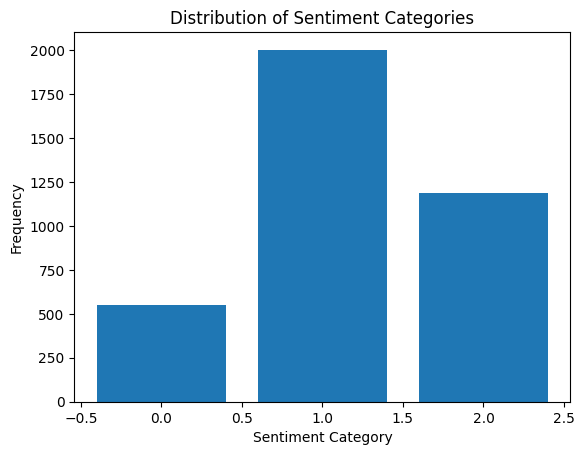

In [ ]:
# Create a bar plot to visualize the distribution
unique, counts = np.unique(train['Sentiment'], return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.show()

Separamos las oraciones y el sentimiento que representan.


In [ ]:
X_train, X_test, X_val= train['Sentence'], test['Sentence'], val['Sentence']
y_train, y_test, y_val= train['Sentiment'], test['Sentiment'], val['Sentiment']

print("x_train", X_train.shape, " y_train:", y_train.shape)
print("x_test:", X_test.shape, "y_test", y_test.shape)
print("x_val", X_val.shape, "y_val:", y_val.shape)

X_train

x_train (3738,)  y_train: (3738,)
x_test: (1169,) y_test (1169,)
x_val (935,) y_val: (935,)


3097    Digia will also set up two subsidiaries , Digi...
5048    $BBRY Sierra. Has a great cash balance and imp...
5727    Britain's FTSE gains, Land Securities up after...
185     The Finnish company sold its UK operation - co...
4265    Russian Media Ventures ' minority shareholder ...
                              ...                        
326                 ( I&H ) in a move to enhance growth .
2821    In addition , a further 29 employees can be la...
4365    The paper industry 's de-inking sludge , which...
1603    $JE LOOKS like we are bouncing.  Would be nice...
200     A survey conducted by Taloustutkimus for Sampo...
Name: Sentence, Length: 3738, dtype: object

Una de las ventajas de utilizar transformers es que también incorporan una capa de preprocesamiento de datos, lo que simplifica el proceso para utilizarlos.

##**4. Modelamiento**

###Modelo distilbert de huggingface

Es un modelo de lenguaje natural basado en la arquitectura de BERT, pero más pequeño, rápido y económico. Fue propuesto por Hugging Face en 2019. El modelo fue entrenado mediante destilación de BERT base y tiene un 40% menos de parámetros que bert-base-uncased, corre un 60% más rápido y preserva más del 95% del rendimiento de BERT.

Para trabajar con los transformes de huggingface se utiliza la librería transformers, en este caso importamos el tokenizador (pro-proceamiento que requiere el transformers y el modelo)

Hacemos el preprocesamiento de nuestros conjuntos de datos:

In [ ]:
# Tokenización
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
X_train = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_train]
X_val = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_val]
X_test = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_test]


Ahora vamos a hacer un padding, lo cual es una práctica común en el procesamiento de texto para asegurar que todas las secuencias de texto tengan la misma longitud.

In [ ]:
max_sequence_length = max(len(seq) for seq in X_train)

In [ ]:
max_sequence_length

98

In [ ]:
#
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_sequence_length, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

Ahora generamos nuestro modelo a partir del modelo DistilBERT

In [ ]:
# Crear el modelo DistilBERT
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# Agregar una capa de clasificación explícita
classification_layer = tf.keras.layers.Dense(3, activation='softmax')  # 'num_classes' es el número de clases en tu tarea de clasificación

# Crear el modelo combinado
input_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int32)
outputs = model(input_ids)[0]  # Salidas de la capa de logits
outputs = classification_layer(outputs)

combined_model = tf.keras.Model(inputs=input_ids, outputs=outputs)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  # from_logits=False ya que estamos usando 'softmax' en la capa de clasificación
combined_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Entrenamiento
history = combined_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=16,
    callbacks= EarlyStopping(monitor='val_accuracy', patience=3)
)

Epoch 1/15
234/234 [==============================] - 108s 295ms/step - loss: 0.9643 - accuracy: 0.5680 - val_loss: 0.9461 - val_accuracy: 0.5508
Epoch 2/15
234/234 [==============================] - 50s 214ms/step - loss: 0.8240 - accuracy: 0.6602 - val_loss: 0.6368 - val_accuracy: 0.7412
Epoch 3/15
234/234 [==============================] - 48s 205ms/step - loss: 0.5253 - accuracy: 0.7841 - val_loss: 0.5138 - val_accuracy: 0.7561
Epoch 4/15
234/234 [==============================] - 44s 189ms/step - loss: 0.3533 - accuracy: 0.8427 - val_loss: 0.5142 - val_accuracy: 0.7690
Epoch 5/15
234/234 [==============================] - 45s 191ms/step - loss: 0.2589 - accuracy: 0.8791 - val_loss: 0.5530 - val_accuracy: 0.7743
Epoch 6/15
234/234 [==============================] - 47s 200ms/step - loss: 0.2116 - accuracy: 0.8919 - val_loss: 0.6825 - val_accuracy: 0.7422
Epoch 7/15
234/234 [==============================] - 44s 190ms/step - loss: 0.1931 - accuracy: 0.8981 - val_loss: 0.6242 - val_a

#### Evaluación

In [ ]:
# Evaluación
results = combined_model.evaluate(X_test, y_test)
print("Loss:", results[0])
print("Accuracy:", results[1])

37/37 [==============================] - 4s 106ms/step - loss: 0.6135 - accuracy: 0.7725
Loss: 0.6134923696517944
Accuracy: 0.772455096244812


In [ ]:
y_pred = combined_model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 14s 104ms/step
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       550
           1       0.97      0.88      0.93      2003
           2       1.00      1.00      1.00      1185

    accuracy                           0.92      3738
   macro avg       0.88      0.93      0.90      3738
weighted avg       0.94      0.92      0.93      3738



In [ ]:
y_pred = combined_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 4s 104ms/step
              precision    recall  f1-score   support

           0       0.43      0.55      0.48       172
           1       0.86      0.77      0.82       626
           2       0.84      0.87      0.85       371

    accuracy                           0.77      1169
   macro avg       0.71      0.73      0.72      1169
weighted avg       0.79      0.77      0.78      1169



##**5. Exportar el modelo**

Un [SavedModel](https://www.tensorflow.org/guide/saved_model) en TensorFlow es un formato de archivo que se utiliza para guardar modelos, incluyendo su estructura, parámetros y gráficos de computación de una manera que es independiente del lenguaje y del entorno. Esto permite exportar modelos de TensorFlow y utilizarlos en diferentes entornos, como TensorFlow en Python, TensorFlow en C++, TensorFlow Serving, TensorFlow.js, etc.

Existen diferencias significativas entre los formatos `SavedModel`, `HDF5 (H5)` y `Pickle (PCKL)` en términos de su funcionalidad y su propósito. A continuación, se detallan las diferencias clave entre estos tres formatos:

1. **SavedModel**:
   - **Propósito**: El formato `SavedModel` es específico de TensorFlow y está diseñado para guardar modelos de aprendizaje automático, incluyendo su estructura, parámetros, gráficos de computación y metadatos. Está optimizado para la interoperabilidad y la reutilización en entornos de TensorFlow.
   - **Portabilidad**: Puede ser utilizado en diferentes entornos de TensorFlow, incluyendo TensorFlow en Python, TensorFlow en C++, TensorFlow Serving y otros. Esto lo hace ideal para la implementación en una variedad de plataformas y servicios de producción.

2. **HDF5 (H5)**:
   - **Propósito**: El formato HDF5 es un formato de archivo de datos jerárquico utilizado para almacenar una amplia variedad de datos científicos y estructurados. En el contexto de modelos de aprendizaje automático, se utiliza para guardar la arquitectura del modelo (capas, conexiones, etc.) y los valores de los pesos del modelo.
   - **Portabilidad**: Puede ser utilizado en diferentes bibliotecas y lenguajes, no solo en TensorFlow. Esto lo hace útil para la interoperabilidad entre diferentes frameworks y herramientas de aprendizaje automático.

3. **Pickle (PCKL)**:
   - **Propósito**: El formato `Pickle` es un módulo de serialización de Python que se utiliza para guardar y cargar objetos de Python. Puede utilizarse para guardar objetos en general, incluyendo modelos de aprendizaje automático. Sin embargo, no está diseñado específicamente para modelos de aprendizaje automático y no almacena información sobre la arquitectura de un modelo ni su gráfico de cómputo.
   - **Portabilidad**: Puede ser utilizado dentro de Python y es adecuado para guardar y cargar objetos de Python, pero no es tan adecuado para la interoperabilidad entre diferentes lenguajes o entornos.



In [ ]:
import os

#Crear la ruta donde almacenar el modelo:
model_save_path = "/content/model"

if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Guardar el modelo entrenado en un archivo
combined_model.save(model_save_path)

In [ ]:
import shutil

zip_file_path = "/content/exported_model"

# Comprimir la carpeta del modelo en un archivo ZIP
shutil.make_archive(zip_file_path, 'zip', model_save_path)


'/content/exported_model.zip'

In [ ]:
from google.colab import files

files.download("/content/exported_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**6. Crear el aplicativo - Streamlit**

Streamlit, un marco de desarrollo de código abierto en Python, se destaca por su capacidad para facilitar la creación de aplicaciones web interactivas y visualizaciones de datos de forma eficiente. Su singularidad radica en su enfoque hacia la simplicidad y facilidad de uso, permitiendo a los desarrolladores construir aplicaciones web con un mínimo de código.

Este marco es especialmente útil para el prototipado rápido, la creación de paneles de control interactivos y aplicaciones de datos, todo ello sin necesidad de tener experiencia previa en desarrollo web. Su diseño intuitivo y accesible lo convierte en una herramienta ideal para los desarrolladores que buscan optimizar su flujo de trabajo.

En un entorno de desarrollo como Visual Studio Code (VS Code), tenemos el modelo exportado (exported_model), el código de la aplicación (app.py) y eel ambiente virtual (venv) para el cual se tienen instaladas las librerias streamlit, tensorflow y transformers.

Se hace el cargue del modelo mediante tf.saved_model.load:

```model = tf.saved_model.load("exported_model")```

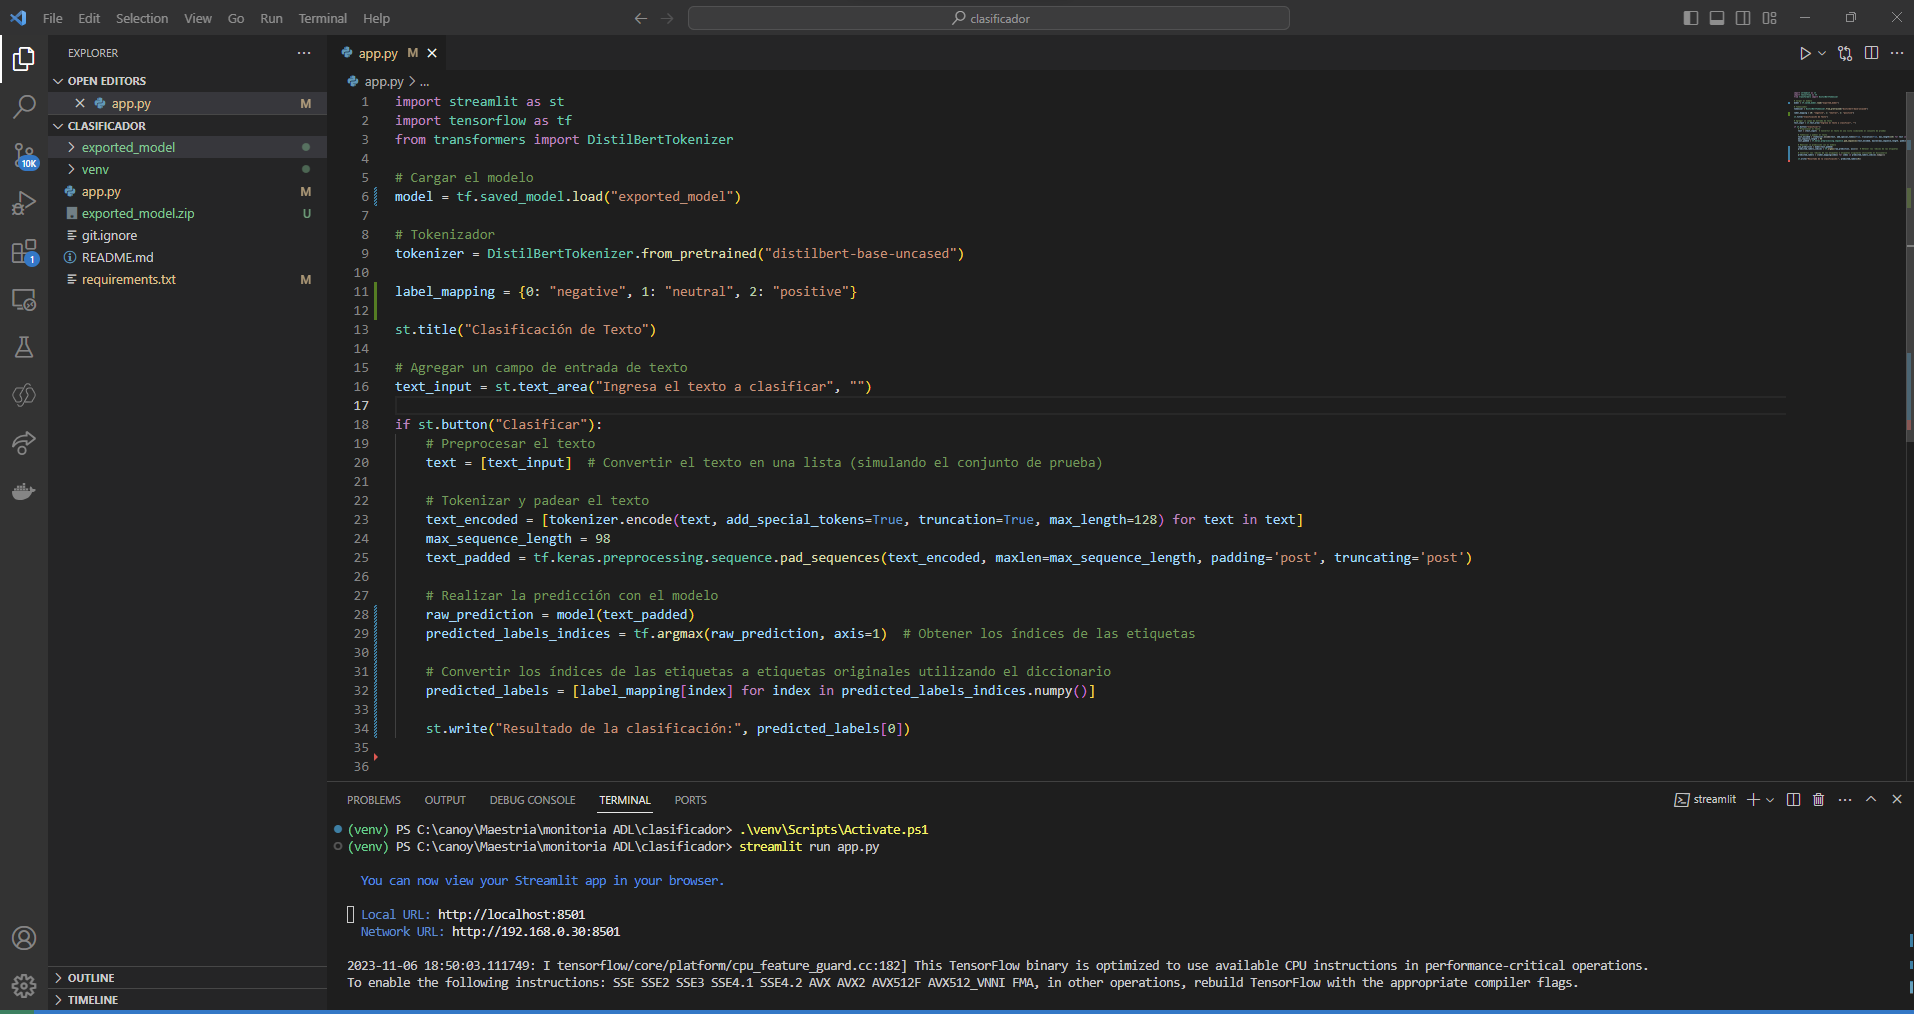

Podemos ejecutar la aplicacion en el entorno local mediante el comando:

```streamlit run app.py```

Obtenemos algunas frases para probarlas en nuestro aplicativo:

In [ ]:
unique_sentiments = data['Sentiment'].unique()

# Definir el número máximo de ejemplos que deseas mostrar
max_examples = 5
examples_shown = 0

for sentiment in unique_sentiments:
    # Iterar a través de las filas con el valor de sentimiento específico
    for _, row in data[data['Sentiment'] == sentiment].iterrows():
        print("Sentiment:", sentiment)
        print("Sentence:", row['Sentence'])
        print()
        examples_shown += 1
        if examples_shown >= max_examples:
            break  # Salir del bucle cuando se muestran los ejemplos deseados
    if examples_shown >= max_examples:
        break  # Salir del bucle externo cuando se muestran los ejemplos deseados


Sentiment: 2
Sentence: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .

Sentiment: 2
Sentence: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .

Sentiment: 2
Sentence: $SPY wouldn't be surprised to see a green close

Sentiment: 2
Sentence: Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .

Sentiment: 2
Sentence: Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .



Ponemos el texto, y con el boton de clasificar obtenemos la clasificación que nos da el modelo entrenado:

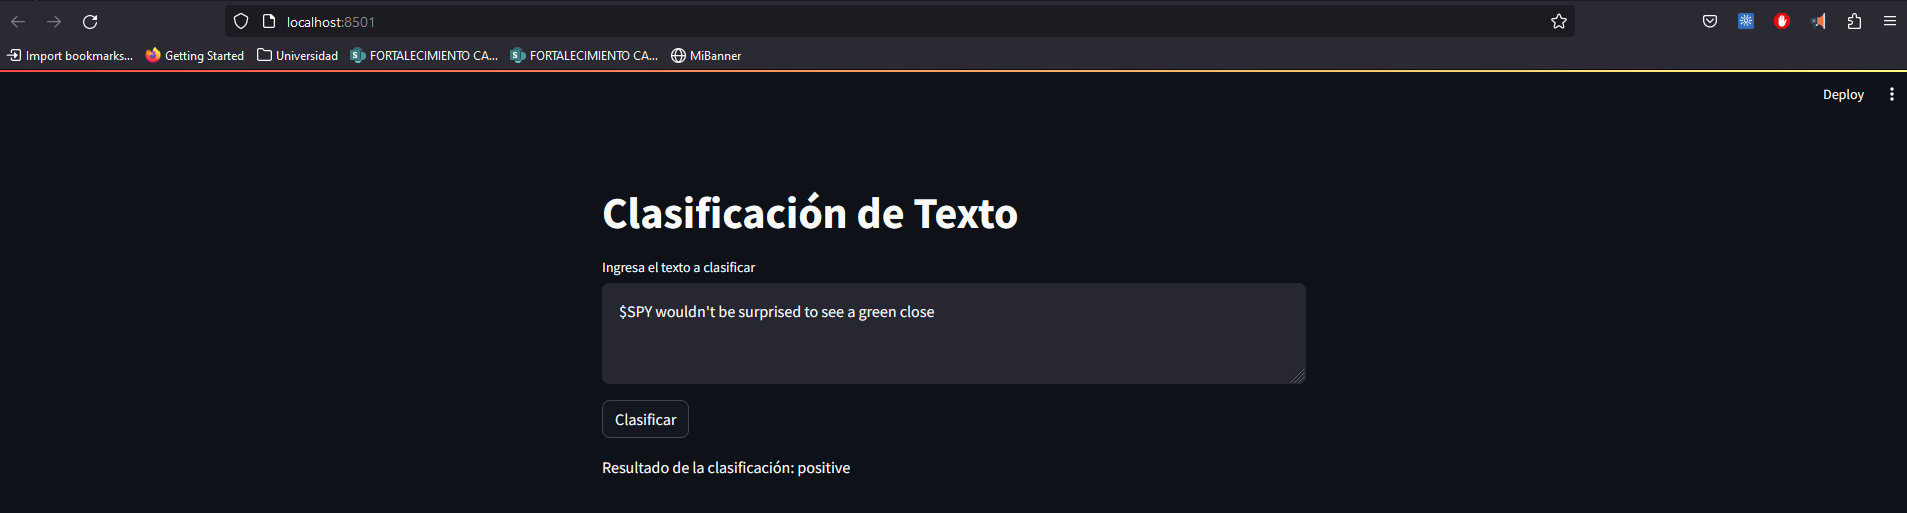

##**7. Despliegue en  Streamlit cloud**

Para realizar el despligue es indispensable que el código esté versionado en github, como algunos archivos del modelo superan los 100MB que permite git es posible que requiera usar  Git LFS (Git Large File Storage) para poder subirlos al repositorio. También es importante que la estructura del repositorio sea similar a:

```
tu-repositorio/
├── tu_app.py
└── requirements.txt
```

1. Accdeder a: https://streamlit.io/cloud, aqui se puede vincular la cuenta de github en donde se tiene el código de la aplicación

2. Dar clic en **New app**

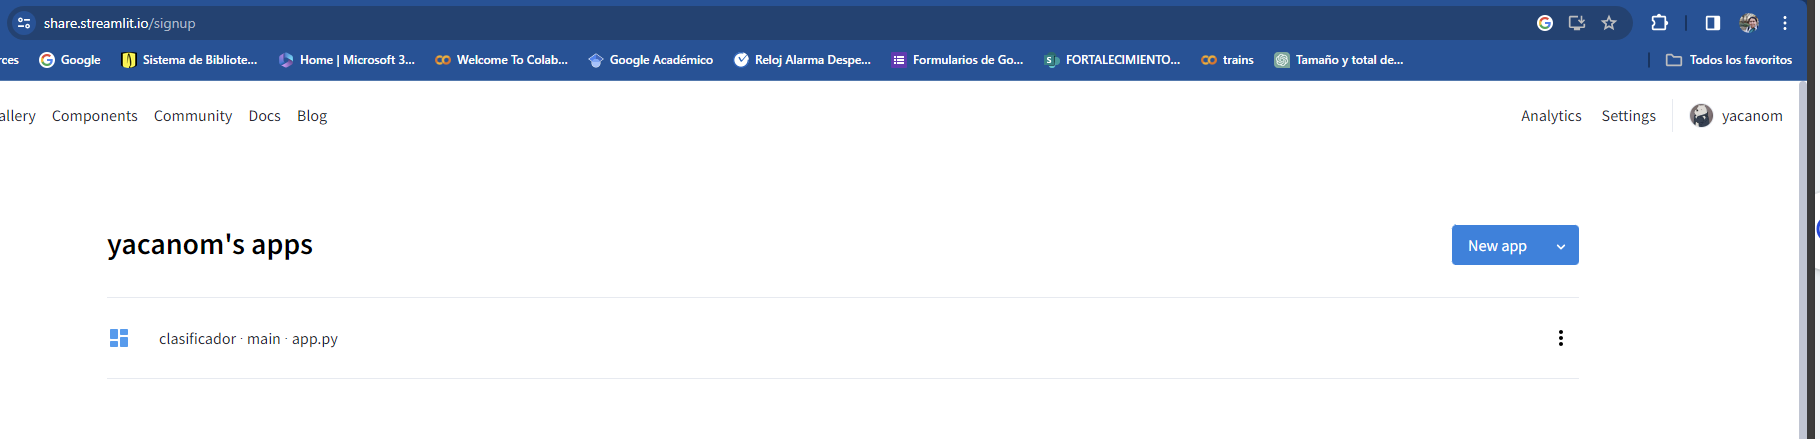

3. Seleccione la opción: Paste GitHub URL

4. En GitHub URL, indique la url del archivo app.py dentro del repositorio de github, por ejemplo: ```https://github.com/yacanom/clasificador/blob/main/app.py```

5. Streamlit generá automáticamente la url donde se expone la aplicación y realizará el despligue:



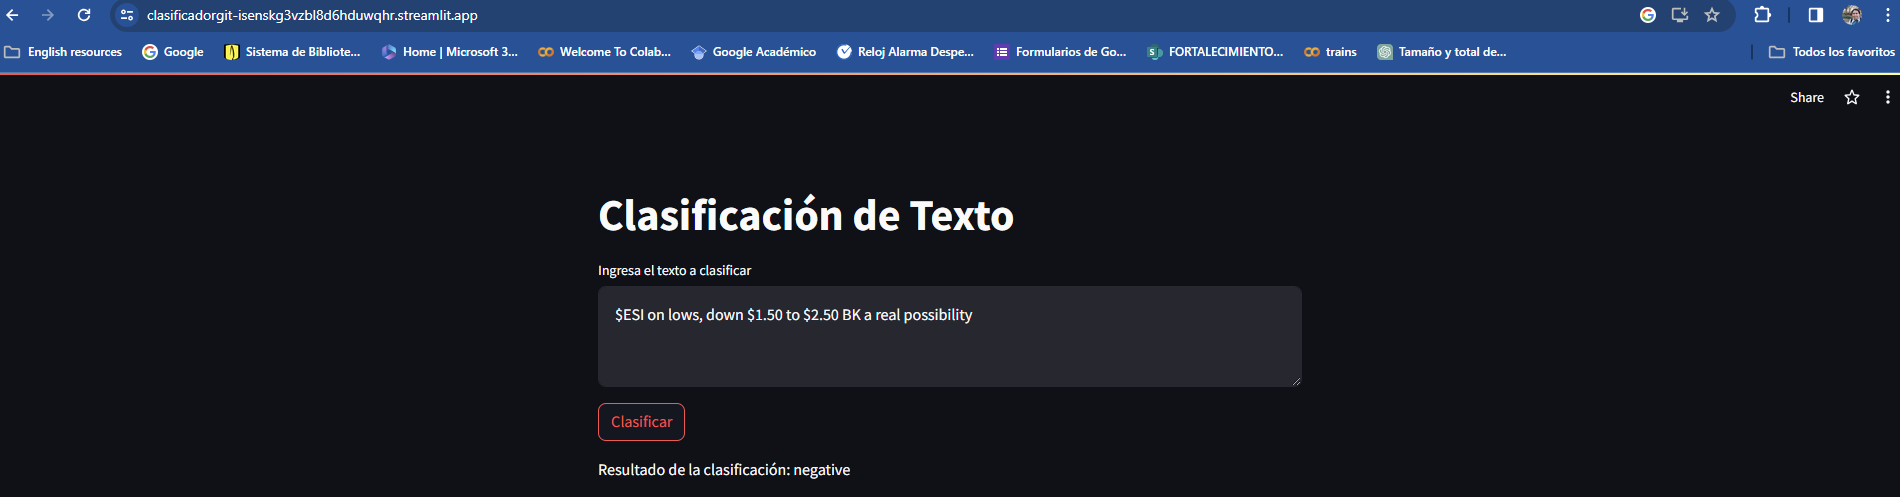